#Homework 3: Twitter Analysis 

##Kobie Williams 

###4/18/2022

In [ ]:
#1c: 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
#1d 
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1__QUstuyI7rW96U_hadauOxL1ZHgW4GN')

In [ ]:
df.head(2)

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image
0,3/15/16,@_Lightscap3s_,Otis,"RT @NatureBridge: ""NatureBridge is Highlight o...",7.100000e+17,RoundTeam,2644,590.0,1,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View
1,3/21/16,@_Lightscap3s_,Otis,RT @NatureBridge: By 2050 we want more fish th...,7.120000e+17,RoundTeam,2641,587.0,2,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View


In [ ]:
#2a
df['App'].value_counts().head(9)

Twitter for iPhone     1431
Twitter Web Client     1395
TweetDeck               924
Twitter for iPad        570
Twitter for Android     470
Hootsuite               292
Storify                  74
RoundTeam                71
Buffer                   66
Name: App, dtype: int64

In [ ]:
df.head(1)

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image
0,3/15/16,@_Lightscap3s_,Otis,"RT @NatureBridge: ""NatureBridge is Highlight o...",7.100000e+17,RoundTeam,2644,590.0,1,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View


In [ ]:
#2b 
#We want to take out the retweets, so use reg ex 
print('Original tweets:', str(df["Tweet Text"].str.extract(r'(^[^R][^T])', expand=False).count()))
print() 
print('Retweets', str(df["Retweets"].sum()))


Original tweets: 2926

Retweets 12779


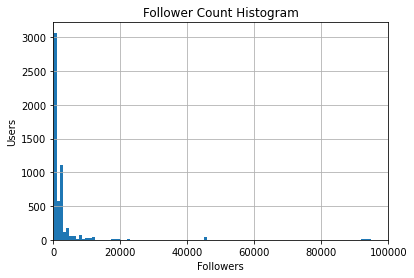

In [ ]:
#2c 

#Histogram 
plt.hist(df['Followers'], bins=800)
plt.xlim(left=0,right=100000) 
plt.xlabel('Followers') 
plt.ylabel('Users') 
plt.title('Follower Count Histogram') 
plt.grid(True) 
plt.show()

In [ ]:
#2D 
print('Top 25 Locations (based on number of tweets): \n', df['Location'].value_counts().head(25))

Top 25 Locations (based on number of tweets): 
 Caledon, Ontario                  592
Dundas Valley, NSW                187
Springbrook Public School         184
Ontario, Canada                   163
EveningShadowofCanadianRockies    142
New South Wales, Australia        126
Canada                            119
Virginia Beach, VA                112
Kurrajong Heights, near Sydney    110
PDSB                               81
Washington DC                      78
Grand Haven Michigan               60
Calgary, Alberta.                  60
Boston, MA                         59
Alberta, Canada                    59
Australia                          57
Durham NC                          54
Ontario                            53
Sydney                             52
Sackville North, NSW Australia     49
Bainbridge Island, WA              49
Mississauga, Ontario, Canada       45
Elon, NC                           44
Toronto                            38
Ottawa, Ontario                    37
Na

In [ ]:
#2d: 
print('Top 25 locations(based on number of users from that location)', df[['Screen Name', 'Location']].groupby('Location').nunique().head(25))

Top 25 locations(based on number of users from that location)                                  Screen Name
Location                                    
  Sierra  Foothills CA    2015             1
 BC, CANADA                                1
 ~London, Avalon & World Wide~             1
#1 City for Crony-Capitalists              1
#DiversityInApps                           1
11 states + DC                             1
1620 Blohm Drive, Ottawa, ON               1
30 miles east of KC on Hwy 50              1
40°41′21″N 74°2′40″W                       1
424                                        1
4929 Jane St, Toronto                      1
50 Ladore Drive, Brampton                  1
51.4117000,-95.3813999                     1
57.294032,-2.387916                        1
70 Pond Hill Rd Wallingford                1
75% of the earth                           1
@JohnLundin, editor                        1
@KinderWonders                             1
Abbotsford                            

4/20/16    304
5/4/16     231
4/13/16    230
5/18/16    224
3/30/16    210
          ... 
3/27/16     14
4/3/16      13
3/26/16     12
4/10/16      9
3/8/16       5
Name: Date, Length: 85, dtype: int64


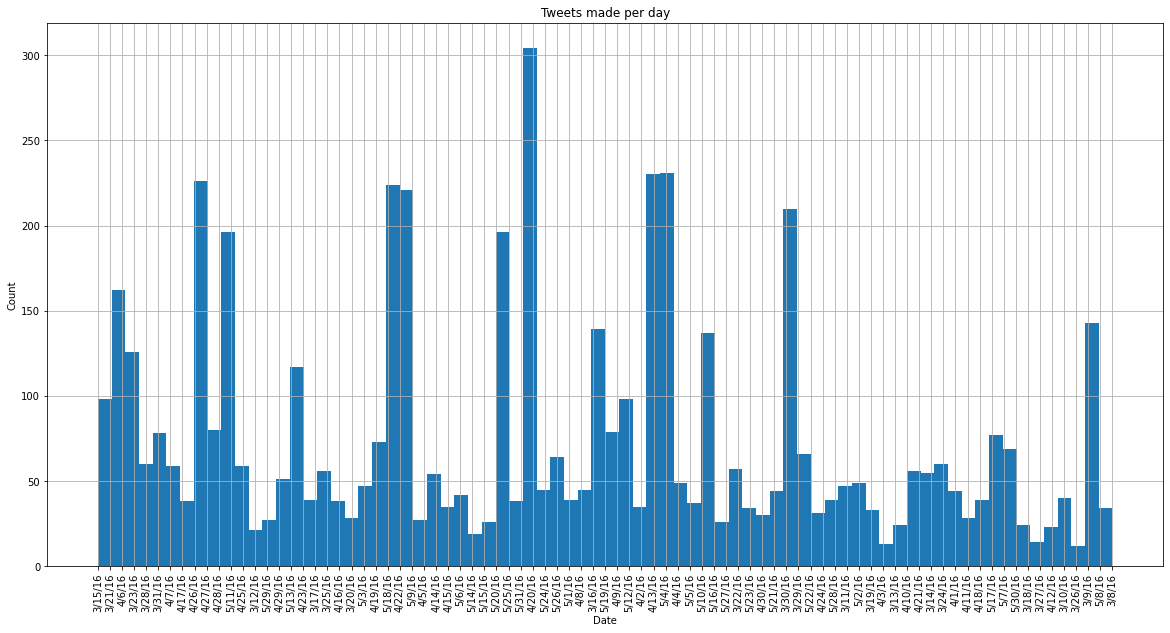

In [ ]:
#2e

print(df['Date'].value_counts()) 
plt.figure(figsize=(20,10))
plt.hist(df['Date'], bins=74) 
plt.xlabel('Date') 
plt.ylabel('Count') 
plt.title('Tweets made per day') 
plt.grid(True) 
plt.xticks(rotation='vertical') 
plt.show() 

0         Tuesday
1          Monday
2       Wednesday
3       Wednesday
4       Wednesday
          ...    
5509    Wednesday
5510     Saturday
5511      Tuesday
5512     Thursday
5513      Tuesday
Name: Date, Length: 5514, dtype: object


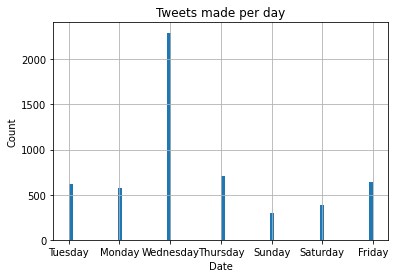

In [ ]:
dates = pd.to_datetime(df["Date"]).dt.day_name()
print(dates)
# print(dates)

# tempVari = df["Date"]
# Histogram (Tweet per Day)

plt.hist(dates, bins=74)
# plt.xlim(right = df["Followers"].max())
# plt.xlim(left = 0, right = 100000)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Tweets made per day')
plt.grid(True)
# Rotates and right-aligns the x labels so they don't crowd each other.
# fig, ax = plt.subplots()
# plt.xticks(df["Date"].to_numpy(), rotation='vertical')
# for label in ax.get_xticklabels(which='major'):
#     label.set(rotation=30, horizontalalignment='right')

plt.show()

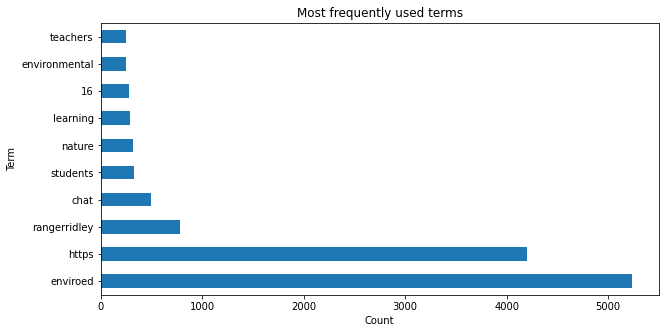

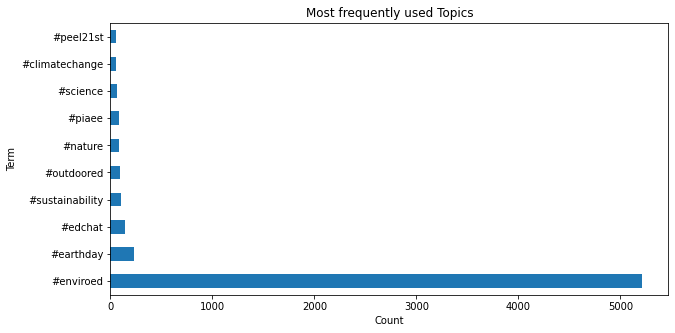

In [ ]:
#2f 

tweet_corpus = pd.DataFrame(df["Tweet Text"].to_numpy(), columns=['doc_text'])
# print(tweet_corpus)

from sklearn.feature_extraction.text import CountVectorizer

# Specify stop words that should be ignored.
stop_list = ['a', 'an', 'the', 'and', 'has', 'I', 'in', 'for', 'but', 'of',
              'not', 'can', 'are', 'not', 'when', 'it', 'is', 'its', 'comes',
              'do', 'be', 'how', 'put', 'able', 'been', 'just', 'into', 'so', 'me'
              'you', 'we', 'our', 'on', 'to', 'rt', 'co', 'your', 'this', 'with'
              'at', 'about', 'from', 'that', 'great', 'you', 'by', 'with', 'at',
              'what', ]

# The next 2 lines accomplish several steps:
# - makes everything lowercase (optional)
# - removes stop words
# - removes punctuation
# - tokenization
# Note that there is no easy way to do stemming without another library, nltk.
count_vect = CountVectorizer(lowercase=True, stop_words=stop_list)
sparse_counts = count_vect.fit_transform(tweet_corpus['doc_text'])

counts = np.asarray(sparse_counts.todense())

count_vect.get_feature_names_out()

terms = count_vect.get_feature_names_out()
total_counts = counts.sum(axis=0)

df_counts = pd.DataFrame()
df_counts['term'] = terms
df_counts['count'] = total_counts
df_counts = df_counts.sort_values(by='count', ascending=False)

# Just keep the top 10
df_counts = df_counts.iloc[:10]

df_counts.plot(y='count', x='term', kind='barh', legend=None, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Term')
plt.title('Most frequently used terms')
plt.show()



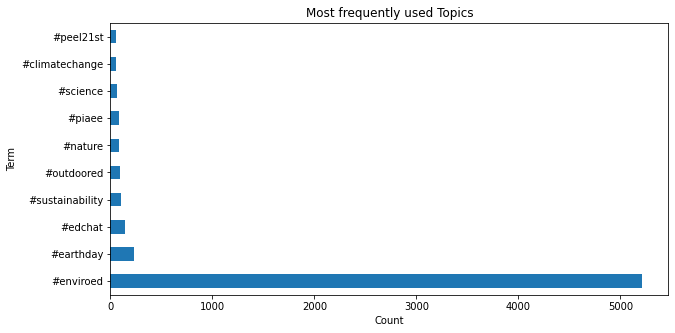

In [ ]:
#2f

count_vect = CountVectorizer(lowercase=True, stop_words=stop_list, token_pattern=r"(\#\w+)")
sparse_counts = count_vect.fit_transform(tweet_corpus['doc_text'])

counts = np.asarray(sparse_counts.todense())

count_vect.get_feature_names_out()

terms = count_vect.get_feature_names_out()
total_counts = counts.sum(axis=0)

df_counts = pd.DataFrame()
df_counts['term'] = terms
df_counts['count'] = total_counts
df_counts = df_counts.sort_values(by='count', ascending=False)

# Just keep the top 10
df_counts = df_counts.iloc[:10]

df_counts.plot(y='count', x='term', kind='barh', legend=None, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Term')
plt.title('Most frequently used Topics')
plt.show()

In [ ]:
import networkx as nx

#2g

# We'll represent this as a directed graph
G = nx.DiGraph()

nodes = df["Screen Name"].unique()
edges = []

for index, row in df.iterrows():
  from_node = row["Screen Name"]
  for name in nodes:
    if name in row["Tweet Text"]:
      to_node = name
      if G.has_edge(from_node, to_node):
        w = G.get_edge_data(from_node, to_node)['weight']
        # print('  found existing edge, increasing weight to:', w+1)
        G.add_edge(from_node, to_node, weight=w+1)
      else:
        # Otherwise, add the edge with a weight of 1
        # print('  adding edge with weight: 1')
        G.add_edge(from_node, to_node, weight=1)

In [ ]:
#2g

print(nx.info(G),'\n')
# networkx can calculate these measures and return a dictionary
# with a key for each node.
print('- In Degree Centrality:\n', nx.in_degree_centrality(G))
print('\n- Out Degree Centrality:\n', nx.out_degree_centrality(G))
print('\n- Betweenness Centrality:\n', nx.betweenness_centrality(G))
print('\n- Closeness Centrality:\n', nx.closeness_centrality(G))
print('\n- Eigenvector Centrality\n', nx.eigenvector_centrality(G))

DiGraph with 1511 nodes and 2966 edges 

- In Degree Centrality:
 {'@_Lightscap3s_': 0.0, '@NatureBridge': 0.009933774834437087, '@_Lindsay_Conway': 0.0, '@savageducates': 0.0026490066225165563, '@_mcisneros19': 0.001986754966887417, '@doctormorrison': 0.016556291390728478, '@amk_elon': 0.004635761589403974, '@DannyBavis': 0.005298013245033113, '@paigebl213': 0.001986754966887417, '@sgilley12': 0.0026490066225165563, '@_swatik_': 0.0, '@EnviroEducators': 0.046357615894039736, '@_withah': 0.0, '@ItsAboutTimeEDU': 0.005960264900662251, '@02Benson': 0.0, '@COrgbon': 0.001986754966887417, '@GreeningForward': 0.0013245033112582781, '@109ThornKs': 0.0, '@RangerRidley': 0.16225165562913907, '@1915Aurora': 0.0, '@ArmeniaTree': 0.013245033112582781, '@CivilNetTV': 0.007947019867549669, '@JasonSohigian': 0.004635761589403974, '@1GratefulWorld': 0.0, '@CNC90': 0.006622516556291391, '@fatim_to': 0.009933774834437087, '@MrsEimers': 0.007947019867549669, '@OLVPrincipal': 0.00728476821192053, '@1stof

We see that @_Lightscap3s has some of the highest degree centrality for everything, so on the graph I would expect them to be in the middle of everything

In [ ]:
from operator import itemgetter

#2g 

# networkx can calculate these measures and return a dictionary
# with a key for each node.
in_degree_dict = nx.in_degree_centrality(G)
out_degree_dict = nx.out_degree_centrality(G)
betweenness_dict = nx.betweenness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G)
print('- In Degree Centrality:\n', sorted(nx.in_degree_centrality(G).items(), key=itemgetter(1))[:20])
print('\n- Out Degree Centrality:\n', sorted(nx.out_degree_centrality(G).items(), key=itemgetter(1))[:20])
print('\n- Betweenness Centrality:\n', (sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1)))[:20])
print('\n- Eigenvector Centrality\n', (sorted(nx.eigenvector_centrality(G).items(), key=itemgetter(1)))[:20])

- In Degree Centrality:
 [('@_Lightscap3s_', 0.0), ('@_Lindsay_Conway', 0.0), ('@_swatik_', 0.0), ('@_withah', 0.0), ('@02Benson', 0.0), ('@109ThornKs', 0.0), ('@1915Aurora', 0.0), ('@1GratefulWorld', 0.0), ('@2015_Project', 0.0), ('@22C0in', 0.0), ('@3PennyMovies', 0.0), ('@500eco', 0.0), ('@5intadewi', 0.0), ('@6Veronicadr', 0.0), ('@A_Dobbie11', 0.0), ('@AACPS_PGD', 0.0), ('@AAPCA_States', 0.0), ('@aaronpaquette', 0.0), ('@aawasp', 0.0), ('@Abby_Retweet', 0.0)]

- Out Degree Centrality:
 [('@NatureBridge', 0.0), ('@savageducates', 0.0), ('@paigebl213', 0.0), ('@sgilley12', 0.0), ('@EPA', 0.0), ('@actionbonnie', 0.0), ('@MindShiftKQED', 0.0), ('@UncleChaps', 0.0), ('@jackehill', 0.0), ('@TorontoWaldorf', 0.0), ('@eecom_info', 0.0), ('@CommunitiesONHS', 0.0), ('@willjohnst', 0.0), ('@McGrawHillK12', 0.0), ('@Moonbattery1', 0.0), ('@insideeducation', 0.0), ('@vickiemorgado1', 0.0), ('@visitpama', 0.0), ('@BigHistoryPro', 0.0), ('@kristapetrie', 0.0)]

- Betweenness Centrality:
 [('@_Li

In [ ]:
#2g 

print("User: @_Lightscap3s_")
print("{in_degreeL",in_degree_dict["@_Lightscap3s_"])
print("out_degree",out_degree_dict["@_Lightscap3s_"])
print("betweenness",betweenness_dict["@_Lightscap3s_"])
print("eigenvector",eigenvector_dict["@_Lightscap3s_"],"}")

print()

print("User: @02Benson")
print("{in_degreeL",in_degree_dict["@02Benson"])
print("out_degree",out_degree_dict["@02Benson"])
print("betweenness",betweenness_dict["@02Benson"])
print("eigenvector",eigenvector_dict["@02Benson"],"}")

print()

print("User: @GreeningForward")
print("{in_degreeL",in_degree_dict["@GreeningForward"])
print("out_degree",out_degree_dict["@GreeningForward"])
print("betweenness",betweenness_dict["@GreeningForward"])
print("eigenvector",eigenvector_dict["@GreeningForward"],"}")

User: @_Lightscap3s_
{in_degreeL 0.0
out_degree 0.0006622516556291391
betweenness 0.0
eigenvector 8.211879969254615e-23 }

User: @02Benson
{in_degreeL 0.0
out_degree 0.0013245033112582781
betweenness 0.0
eigenvector 8.211879969254615e-23 }

User: @GreeningForward
{in_degreeL 0.0013245033112582781
out_degree 0.0006622516556291391
betweenness 0.0
eigenvector 3.2098735204593908e-15 }


We selected @_Lightscap3s, @02Benson, @GreeningForward, and we see that the first one and second one have the highest eigenvector centrality. From this observation, we can say that they are probably the same sized nodes. But 02Benson has a greater out_degree centrality meaning they have more outwards relationship

85 communities found


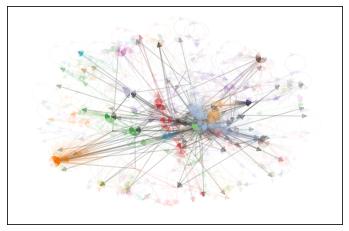

In [ ]:
#2h 

# This library helps find communities within social network graphs
import networkx.algorithms.community as nxcom

communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# communities is a list of sets of vertices
# E.g., communities[0] is a list of the vertices in the first community
print(len(communities), 'communities found')

from matplotlib import cm
# this colormap has RGB values for 20 distinct colors
cm.tab20.colors


# Helper functions to labels nodes/edges with community
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0

# Helper function to get distinct colors for display
def get_color(i):
    colors = cm.tab20.colors

    # If i gets too big for how many colors we have, wrap around
    if i > len(colors)-5:
        i = i % len(colors)

    return colors[i]


# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)


# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]



# Draw external edges
pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)

I see that the blue community has really high in degree centrality and what looks like betweenness centrality and eigenvector centrality. 